# <div style="text-align:center"> Предсказание стоимости жилья. </div>

## Описание проекта.

Необходимо обучить модель линейной регрессии на данных о жилье в Калифорнии в 1990 году. На основе данных нужно предсказать медианную стоимость дома в жилом массиве на тестовой выборке. Для оценки качества модели нужно использовать метрики RMSE, MAE и R2.

### Цели и план работы:
  - **Цели работы:**
    - Предсказать медианную стоимость дома в жилом массиве — `median_house_value` на тестовой выборке. 
    - Оценить качество модели, используя метрики `RMSE`, `MAE` и `R2`.<br><br>
  - **План работы:**
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта." data-toc-modified-id="Описание-проекта.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта.</a></span><ul class="toc-item"><li><span><a href="#Цели-и-план-работы:" data-toc-modified-id="Цели-и-план-работы:-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цели и план работы:</a></span></li><li><span><a href="#Описание-признаков:" data-toc-modified-id="Описание-признаков:-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Описание признаков:</a></span></li></ul></li><li><span><a href="#Загрузка-библиотек-и-инициализация-Spark-сессии." data-toc-modified-id="Загрузка-библиотек-и-инициализация-Spark-сессии.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка библиотек и инициализация Spark-сессии.</a></span><ul class="toc-item"><li><span><a href="#Загрузка-необходимых-библиотек." data-toc-modified-id="Загрузка-необходимых-библиотек.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Загрузка необходимых библиотек.</a></span></li><li><span><a href="#Инициализация-Spark-сессии." data-toc-modified-id="Инициализация-Spark-сессии.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Инициализация Spark-сессии.</a></span></li><li><span><a href="#Установка-параметров-проекта." data-toc-modified-id="Установка-параметров-проекта.-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Установка параметров проекта.</a></span></li></ul></li><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Загрузка данных.</a></span></li><li><span><a href="#Ознакомление-и-исследовательский-анализ-данных." data-toc-modified-id="Ознакомление-и-исследовательский-анализ-данных.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Ознакомление и исследовательский анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Исследовательский-аналих-данных.-Вывод." data-toc-modified-id="Исследовательский-аналих-данных.-Вывод.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследовательский аналих данных. Вывод.</a></span><ul class="toc-item"><li><span><a href="#Информация-о-составе-данных." data-toc-modified-id="Информация-о-составе-данных.-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Информация о составе данных.</a></span></li><li><span><a href="#Целевой-признак:" data-toc-modified-id="Целевой-признак:-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Целевой признак:</a></span></li><li><span><a href="#Задача-машинного-обучения." data-toc-modified-id="Задача-машинного-обучения.-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Задача машинного обучения.</a></span></li><li><span><a href="#Пропуски-в-данных." data-toc-modified-id="Пропуски-в-данных.-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Пропуски в данных.</a></span></li><li><span><a href="#Дубликаты-в-данных." data-toc-modified-id="Дубликаты-в-данных.-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Дубликаты в данных.</a></span></li><li><span><a href="#Особенности-признаков." data-toc-modified-id="Особенности-признаков.-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Особенности признаков.</a></span></li><li><span><a href="#Мультиколлинеарность-и-распределение-медианной-стоимости-по-предикторам." data-toc-modified-id="Мультиколлинеарность-и-распределение-медианной-стоимости-по-предикторам.-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Мультиколлинеарность и распределение медианной стоимости по предикторам.</a></span></li><li><span><a href="#Географическое-распределение-медианной-стоимости-домов-и-населённости." data-toc-modified-id="Географическое-распределение-медианной-стоимости-домов-и-населённости.-4.1.8"><span class="toc-item-num">4.1.8&nbsp;&nbsp;</span>Географическое распределение медианной стоимости домов и населённости.</a></span></li></ul></li></ul></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подготовка данных.</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков." data-toc-modified-id="Заполнение-пропусков.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Заполнение пропусков.</a></span><ul class="toc-item"><li><span><a href="#Заполнение-пропусков.-Вывод." data-toc-modified-id="Заполнение-пропусков.-Вывод.-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Заполнение пропусков. Вывод.</a></span></li></ul></li><li><span><a href="#Создание-дополнительных-признаков." data-toc-modified-id="Создание-дополнительных-признаков.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Создание дополнительных признаков.</a></span><ul class="toc-item"><li><span><a href="#Создание-дополнительных-признаков.-Вывод." data-toc-modified-id="Создание-дополнительных-признаков.-Вывод.-5.2.1"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Создание дополнительных признаков. Вывод.</a></span></li></ul></li><li><span><a href="#Преобразование-распределений-признаков." data-toc-modified-id="Преобразование-распределений-признаков.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Преобразование распределений признаков.</a></span><ul class="toc-item"><li><span><a href="#Преобразование-распределений-признаков.-Вывод." data-toc-modified-id="Преобразование-распределений-признаков.-Вывод.-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>Преобразование распределений признаков. Вывод.</a></span></li></ul></li><li><span><a href="#Разделение-и-анализ-корреляции-признаков." data-toc-modified-id="Разделение-и-анализ-корреляции-признаков.-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Разделение и анализ корреляции признаков.</a></span><ul class="toc-item"><li><span><a href="#Разделение-признаков." data-toc-modified-id="Разделение-признаков.-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Разделение признаков.</a></span></li><li><span><a href="#Анализ-корреляции-признаков." data-toc-modified-id="Анализ-корреляции-признаков.-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>Анализ корреляции признаков.</a></span></li><li><span><a href="#Разделение-и-анализ-корреляции-признаков.-Вывод." data-toc-modified-id="Разделение-и-анализ-корреляции-признаков.-Вывод.-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>Разделение и анализ корреляции признаков. Вывод.</a></span></li></ul></li></ul></li><li><span><a href="#Построение-моделей." data-toc-modified-id="Построение-моделей.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Построение моделей.</a></span><ul class="toc-item"><li><span><a href="#Разделение-выборок." data-toc-modified-id="Разделение-выборок.-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Разделение выборок.</a></span></li><li><span><a href="#Построение-модели:-все-данные." data-toc-modified-id="Построение-модели:-все-данные.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Построение модели: все данные.</a></span><ul class="toc-item"><li><span><a href="#Пайплайн-для-модели-со-всеми-данными." data-toc-modified-id="Пайплайн-для-модели-со-всеми-данными.-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Пайплайн для модели со всеми данными.</a></span></li><li><span><a href="#Обучение-модели.-Метрики." data-toc-modified-id="Обучение-модели.-Метрики.-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Обучение модели. Метрики.</a></span></li></ul></li><li><span><a href="#Построение-модели:-только-количественные-признаки." data-toc-modified-id="Построение-модели:-только-количественные-признаки.-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Построение модели: только количественные признаки.</a></span><ul class="toc-item"><li><span><a href="#Пайплайн-для-модели-с-количественными-признаками." data-toc-modified-id="Пайплайн-для-модели-с-количественными-признаками.-6.3.1"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>Пайплайн для модели с количественными признаками.</a></span></li><li><span><a href="#Обучение-модели.-Метрики." data-toc-modified-id="Обучение-модели.-Метрики.-6.3.2"><span class="toc-item-num">6.3.2&nbsp;&nbsp;</span>Обучение модели. Метрики.</a></span></li></ul></li><li><span><a href="#Построение-модели:-отобранные-признаки." data-toc-modified-id="Построение-модели:-отобранные-признаки.-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Построение модели: отобранные признаки.</a></span><ul class="toc-item"><li><span><a href="#Пайплайн-для-модели-с-отобранными-признаками." data-toc-modified-id="Пайплайн-для-модели-с-отобранными-признаками.-6.4.1"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>Пайплайн для модели с отобранными признаками.</a></span></li><li><span><a href="#Обучение-модели.-Метрики." data-toc-modified-id="Обучение-модели.-Метрики.-6.4.2"><span class="toc-item-num">6.4.2&nbsp;&nbsp;</span>Обучение модели. Метрики.</a></span></li></ul></li><li><span><a href="#Построение-моделей.-Выводы." data-toc-modified-id="Построение-моделей.-Выводы.-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Построение моделей. Выводы.</a></span><ul class="toc-item"><li><span><a href="#Анализ-RMSE." data-toc-modified-id="Анализ-RMSE.-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Анализ RMSE.</a></span></li><li><span><a href="#Анализ-MAE." data-toc-modified-id="Анализ-MAE.-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Анализ MAE.</a></span></li><li><span><a href="#Анализ-r2-коэффициента-детерминации." data-toc-modified-id="Анализ-r2-коэффициента-детерминации.-6.5.3"><span class="toc-item-num">6.5.3&nbsp;&nbsp;</span>Анализ r2 коэффициента детерминации.</a></span></li><li><span><a href="#Рекомендации." data-toc-modified-id="Рекомендации.-6.5.4"><span class="toc-item-num">6.5.4&nbsp;&nbsp;</span>Рекомендации.</a></span></li></ul></li></ul></li><li><span><a href="#Остановка-spark-сессии." data-toc-modified-id="Остановка-spark-сессии.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Остановка spark сессии.</a></span></li><li><span><a href="#Анализ-результатов-работы." data-toc-modified-id="Анализ-результатов-работы.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Анализ результатов работы.</a></span><ul class="toc-item"><li><span><a href="#Информация-о-составе-данных." data-toc-modified-id="Информация-о-составе-данных.-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Информация о составе данных.</a></span></li><li><span><a href="#Целевой-признак:" data-toc-modified-id="Целевой-признак:-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Целевой признак:</a></span></li><li><span><a href="#Задача-машинного-обучения." data-toc-modified-id="Задача-машинного-обучения.-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Задача машинного обучения.</a></span></li><li><span><a href="#Преобразование-распределений-признаков." data-toc-modified-id="Преобразование-распределений-признаков.-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Преобразование распределений признаков.</a></span></li><li><span><a href="#Заполнение-пропусков." data-toc-modified-id="Заполнение-пропусков.-8.5"><span class="toc-item-num">8.5&nbsp;&nbsp;</span>Заполнение пропусков.</a></span></li><li><span><a href="#Мультиколлинеарность." data-toc-modified-id="Мультиколлинеарность.-8.6"><span class="toc-item-num">8.6&nbsp;&nbsp;</span>Мультиколлинеарность.</a></span></li><li><span><a href="#Построение-моделей." data-toc-modified-id="Построение-моделей.-8.7"><span class="toc-item-num">8.7&nbsp;&nbsp;</span>Построение моделей.</a></span><ul class="toc-item"><li><span><a href="#Анализ-RMSE." data-toc-modified-id="Анализ-RMSE.-8.7.1"><span class="toc-item-num">8.7.1&nbsp;&nbsp;</span>Анализ RMSE.</a></span></li><li><span><a href="#Анализ-MAE." data-toc-modified-id="Анализ-MAE.-8.7.2"><span class="toc-item-num">8.7.2&nbsp;&nbsp;</span>Анализ MAE.</a></span></li><li><span><a href="#Анализ-r2-коэффициента-детерминации." data-toc-modified-id="Анализ-r2-коэффициента-детерминации.-8.7.3"><span class="toc-item-num">8.7.3&nbsp;&nbsp;</span>Анализ r2 коэффициента детерминации.</a></span></li></ul></li><li><span><a href="#Рекомендации." data-toc-modified-id="Рекомендации.-8.8"><span class="toc-item-num">8.8&nbsp;&nbsp;</span>Рекомендации.</a></span></li></ul></li></ul></div>

<br>

### Описание признаков:
|Название:|Тип:|Описание:|
|:--|:--|:--|
|**Предикторы:**|||
|longitude|количественный|широта|
|latitude|количественный|долгота|
|housing_median_age|количественный|медианный возраст зданий жилого массива (в описании проекта - "возраст жителей")|
|total_rooms|количественный|общее количество комнат в домах жилого массива|
|total_bedrooms|количественный|общее количество спален в домах жилого массива|
|population|количественный|количество человек, которые проживают в жилом массиве|
|households|количественный|количество домовладений в жилом массиве|
|median_income|количественный|медианный доход жителей жилого массива (в десятках тысяч долларов США)|
|ocean_proximity|качественный|близость к океану|
|**Целевой признак:**|||
|median_house_value|количественный|медианная стоимость дома в жилом массиве|

## Загрузка библиотек и инициализация Spark-сессии.

### Загрузка необходимых библиотек.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

from pyspark.ml import Pipeline
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import (StringIndexer,
                                OneHotEncoder,
                                VectorAssembler, 
                                StandardScaler)
from pyspark.ml.clustering import KMeans
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

from IPython.core.display import HTML

### Инициализация Spark-сессии.

In [2]:
# Инициализируем Spark-сессию.
spark = SparkSession \
    .builder \
    .master("local")\
    .appName('Realty Price Prediction') \
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/07 06:09:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Установка параметров проекта. 

In [3]:
# Установим стиль отображения заголовков таблиц.
styles = [
    dict(selector='caption',
         props=[('text-align', 'center'),
                ('font-size', '130%'),
                ('font-weight', 'bold'),
                ('white-space', 'pre-wrap')]),
    dict(selector="th",
         props=[('max-width', '200px')])
    ]

# Установим размер шрифта описания графиков.
plt.rcParams['font.size'] = '12'

# Зафиксируем начальное значение генератора псевдослучайных чисел.
SEED = 42

# Установим отображение графиков по центру ячейки.
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Загрузка данных.

In [4]:
# Загрузим данные.
df = (spark
      .read
      .option('header', True)
      .csv('/datasets/housing.csv', inferSchema=True))

## Ознакомление и исследовательский анализ данных.

Выведем наименования признаков для проверки и создания англо-русского словаря.

In [5]:
# Выведем названия признаков.
print('\033[1m \n Названия признаков. \033[0m')
display(str(list(df.columns)).strip("'[]"))

 
 Названия признаков. 


"longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity"

In [6]:
# Создадим словарь наименований.
col_names = {'longitude' : 'Долгота', 'latitude' : 'Широта',
             'housing_median_age' : 'Медианный возраст домов', 
             'total_rooms' : 'Всего комнат', 
             'total_bedrooms' : 'Всего спален',
             'population' : 'Кол-во жителей', 
             'households' : 'Кол-во домохозяйств', 
             'median_income' : 'Медианный доход жителей',
             'median_house_value' : 'Медианная стоимость дома', 
             'ocean_proximity' : 'Близость к океану',
             'per_capita_income' : 'Доход на человека',
             'spaces_per_household' : 'Всего помещенией на домохозяйство',
             'ytitle' : 'Количество'}

Для ознакомления с датасетом выведем 
- схему и размер данных;
- первые 20 строк датасета;
- информацию о наличии явных дубликатов;
- информацию о распределении и пропусках в признаках;
- гистограммы числовых и столбчатую диаграмму категориального признака.<br>

Для анализа взаимосвязей выведем
- графики зависимости медианной стоимости жилья и кол-ва жителей от местонахождения и карту штата Калифорния;
- матрицу рассеяния для всех признаков, кроме координат и удалённости от океана с цветовой индикацией медиианной стоимости домов, с разделением стоимости на 6 корзин для наглядности.

Схема  данных.
root
 |-- longitude: double (nullable = true)
 |-- latitude: double (nullable = true)
 |-- housing_median_age: double (nullable = true)
 |-- total_rooms: double (nullable = true)
 |-- total_bedrooms: double (nullable = true)
 |-- population: double (nullable = true)
 |-- households: double (nullable = true)
 |-- median_income: double (nullable = true)
 |-- median_house_value: double (nullable = true)
 |-- ocean_proximity: string (nullable = true)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Кол-во записей: 20640.
Кол-во признаков: 10.


Явных дубликатов не обнаружено.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.230000,37.880000,41.000000,880.000000,129.000000,322.000000,126.000000,8.325200,452600.000000,NEAR BAY
1,-122.220000,37.860000,21.000000,7099.000000,1106.000000,2401.000000,1138.000000,8.301400,358500.000000,NEAR BAY
2,-122.240000,37.850000,52.000000,1467.000000,190.000000,496.000000,177.000000,7.257400,352100.000000,NEAR BAY
3,-122.250000,37.850000,52.000000,1274.000000,235.000000,558.000000,219.000000,5.643100,341300.000000,NEAR BAY
4,-122.250000,37.850000,52.000000,1627.000000,280.000000,565.000000,259.000000,3.846200,342200.000000,NEAR BAY
5,-122.250000,37.850000,52.000000,919.000000,213.000000,413.000000,193.000000,4.036800,269700.000000,NEAR BAY
6,-122.250000,37.840000,52.000000,2535.000000,489.000000,1094.000000,514.000000,3.659100,299200.000000,NEAR BAY
7,-122.250000,37.840000,52.000000,3104.000000,687.000000,1157.000000,647.000000,3.120000,241400.000000,NEAR BAY
8,-122.260000,37.840000,42.000000,2555.000000,665.000000,1206.000000,595.000000,2.080400,226700.000000,NEAR BAY
9,-122.250000,37.840000,52.000000,3549.000000,707.000000,1551.000000,714.000000,3.691200,261100.000000,NEAR BAY


23/10/07 06:10:10 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


,summary,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,count,20640,20640,20640,20640,20433,20640,20640,20640,20640,20640
1,mean,-119.56970445736148,35.6318614341087,28.639486434108527,2635.7630813953488,537.8705525375618,1425.4767441860465,499.5396802325581,3.8706710029070246,206855.81690891474,None
2,stddev,2.003531723502584,2.135952397457101,12.58555761211163,2181.6152515827944,421.38507007403115,1132.46212176534,382.3297528316098,1.899821717945263,115395.61587441359,None
3,min,-124.35,32.54,1.0,2.0,1.0,3.0,1.0,0.4999,14999.0,<1H OCEAN
4,max,-114.31,41.95,52.0,39320.0,6445.0,35682.0,6082.0,15.0001,500001.0,NEAR OCEAN
5,missing count,0,0,0,0,207,0,0,0,0,0


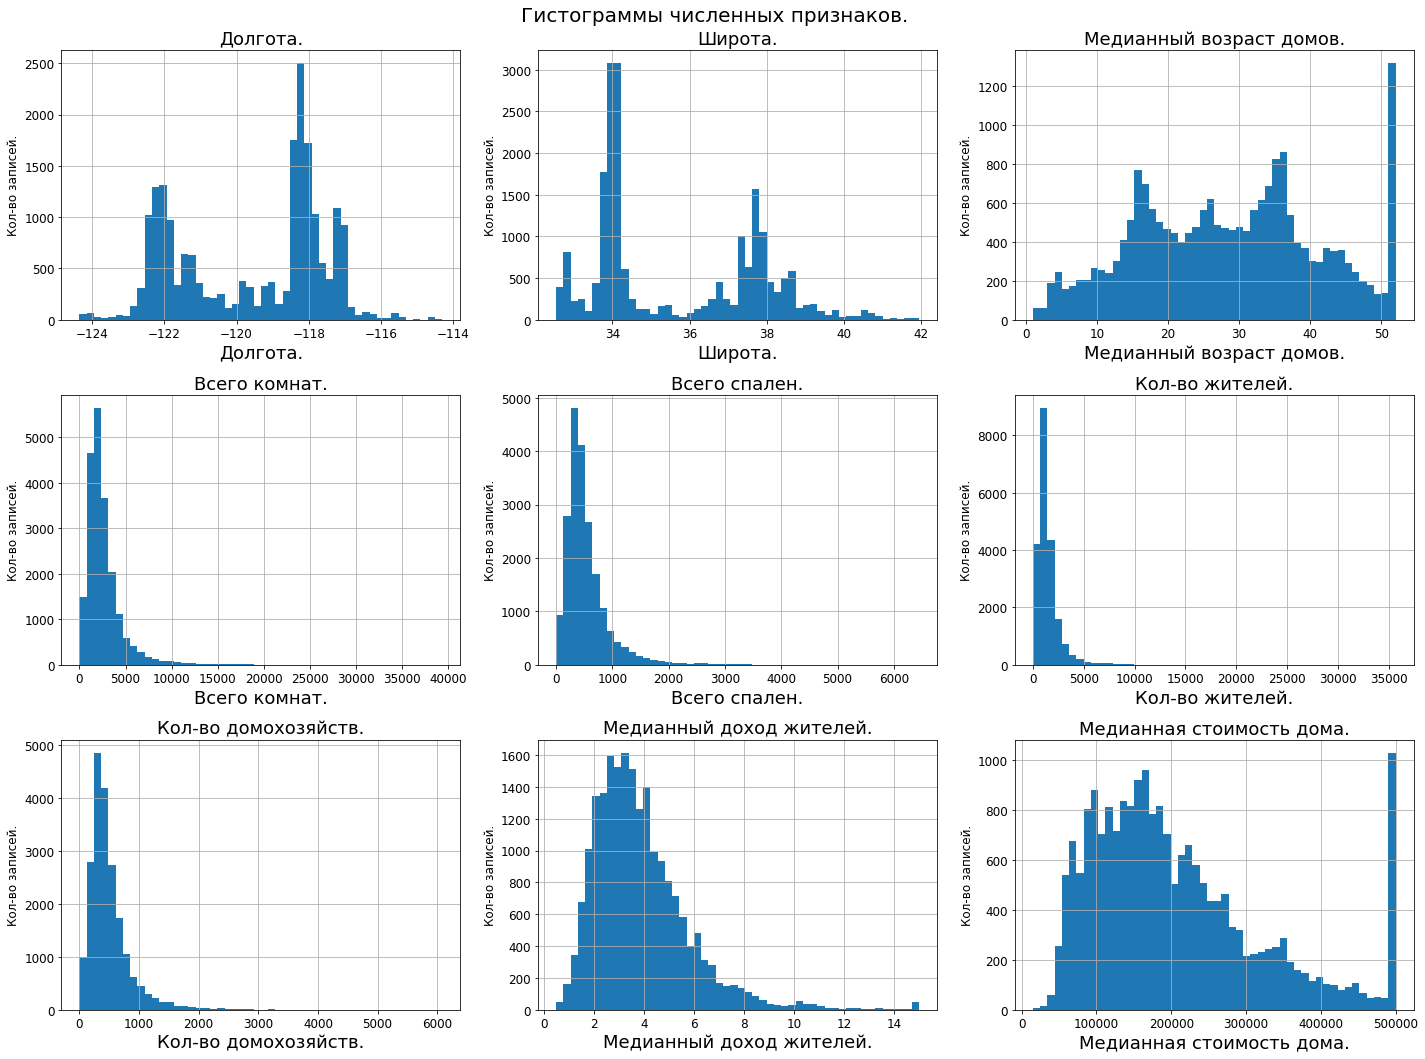

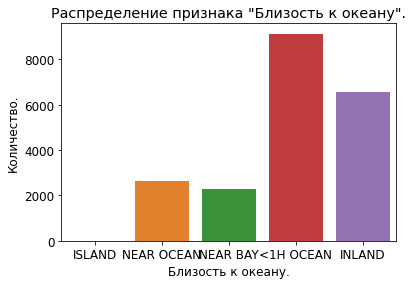

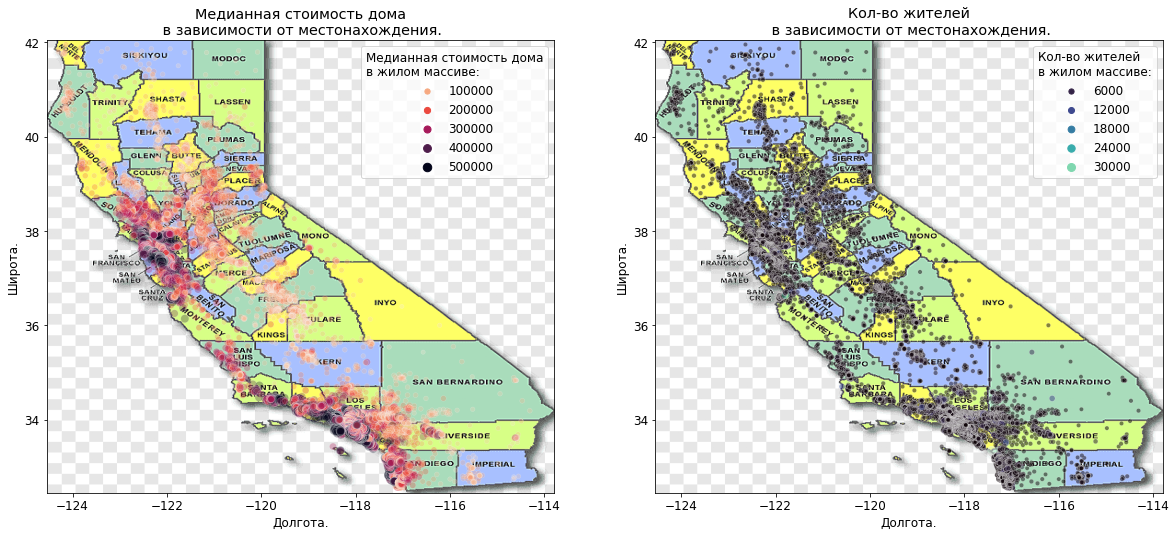

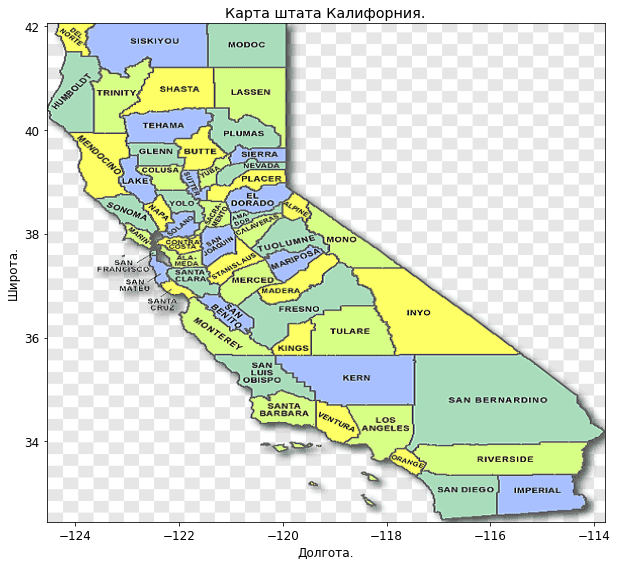

In [7]:
# Выведем схему данных.
print('\033[1mСхема  данных.\033[0m')
df.printSchema()
print('~' * 70)

# Выведем информацию о датасете.
print(f'\033[1mКол-во записей: {df.count()}.')
print(f'Кол-во признаков: {len(df.columns)}.\033[0m')
# Проверим наличие явных дубликатов.
if df.count() > df.dropDuplicates().count():
    print('\033[1mОбнаружены явные дубликаты.\033[0m')
else:
    print('\033[1mЯвных дубликатов не обнаружено.\033[0m')
print('~' * 70)


# Выведем первые 20 строк датафрейма.
display(df
        .limit(20)
        .toPandas()
        .style
        .set_caption('Первые 20 строк датасета.')
        .set_table_styles(styles))
    
# Выведем информацию о распределении данных и кол-ве 
# пропусков в признаках.
# Запишем статистики в сводную таблицу.
df_summary = df.describe().toPandas()

# Посчитаем и добавим пропуски в сводную таблицу 
nan_list = [None, np.nan, 'NULL']
nan_counts = []
for column in df.columns:
    nan_counts.append(df.filter(F.col(column).isin(nan_list) | \
                                F.col(column).isNull()).count())
nan_counts.insert(0, 'missing count')
df_summary.loc[len(df_summary)] = nan_counts

# Выведем информацию о признаках.
display(df_summary
        .style
        .set_caption('Информация о признаках.')
        .set_table_styles(styles))
print('\n\n')

# Выведем гистограммы числовых признаков.
i = 0
j = 0
cols_to_hist = [c for c in df.columns if c != 'ocean_proximity']

fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Гистограммы численных признаков.', fontsize=20)
for i in range(3):
    for j in range(3):
        c = cols_to_hist[i * 3 + j]
        bins, counts = df.select(c).rdd.flatMap(lambda x: x).histogram(50)
        axes[i,j].hist(bins[:-1], bins=bins, weights=counts)
        axes[i,j].set_title(f'{col_names[c]}.', fontsize=18)
        axes[i,j].set_xlabel(f'{col_names[c]}.', fontsize=18)
        axes[i,j].set_ylabel('Кол-во записей.')
        axes[i,j].grid()
plt.tight_layout()
plt.show();
#----------!

# Выведем столбчатую диаграмму катег. признака.
o_p = df.groupby('ocean_proximity').count().toPandas()
sns.barplot(x=o_p.ocean_proximity, y=o_p['count'].values.flatten())
plt.title(f'Распределение признака "{col_names["ocean_proximity"]}".')
plt.xlabel(f'{col_names["ocean_proximity"]}.')
plt.ylabel(f'{col_names["ytitle"]}.')
plt.show();

# Построим графики зависимости медианной стоимости 
# жилья и кол-ва жителей от местонахождения.
# Отберём признаки.
price_vs_place = df.select(['longitude', 'latitude', 
                            'median_house_value']).toPandas()
pop_vs_place = df.select(['longitude', 'latitude', 
                            'population']).toPandas()
# Загрузим карту-фон графиков.
img = plt.imread(''.join(['https://lh3.googleusercontent.com/drive-viewer/',
                          'AK7aPaCi8Sc776TCW4oBustLHO6xXjjZEZ8tQXR5JmDxSv-',
                          'CooomimlsKVx-iohphZOMuWrBTWPySwjXud1dYir8WtSV',
                          'iZwgmw=s1600']))
# Построим графики.
fig, axes = plt.subplots(1, 2, figsize=(20, 20))
# Стоимость от места.
sns.scatterplot(
    data=price_vs_place,
    x='longitude',
    y='latitude',
    size='median_house_value',
    hue='median_house_value',
    palette='rocket_r',
    alpha=.3,
    ax=axes[0]
)
axes[0].imshow(img, extent=[-124.55, -113.80, 32.45, 42.05])
axes[0].set_title('Медианная стоимость дома\n в зависимости '+
                  'от местонахождения.')
axes[0].legend(title='Медианная стоимость дома\nв жилом массиве:')
axes[0].set_xlabel(f'{col_names["longitude"]}.')
axes[0].set_ylabel(f'{col_names["latitude"]}.')
                 
# Населённость от места.
sns.scatterplot(
    data=pop_vs_place,
    x='longitude',
    y='latitude',
    size='population',
    hue='population',
    palette='mako',
    alpha=.5,
    ax=axes[1]
)
axes[1].imshow(img, extent=[-124.55, -113.80, 32.45, 42.05])
axes[1].set_title('Кол-во жителей\n в зависимости от местонахождения.')
axes[1].legend(title='Кол-во жителей\nв жилом массиве:')
axes[1].set_xlabel(f'{col_names["longitude"]}.')
axes[1].set_ylabel(f'{col_names["latitude"]}.')
fig.show();
                 
# Карта.
plt.figure(figsize=(10, 15))
plt.imshow(img, extent=[-124.55, -113.80, 32.45, 42.05])
plt.title('Карта штата Калифорния.')
plt.xlabel(f'{col_names["longitude"]}.')
plt.ylabel(f'{col_names["latitude"]}.')
plt.show();

- Выведем дополнительные сведения о данных:
  - кол-во домов с максимальной ценой 500,001 $;
  - кол-во домов с максимальным возрастом 52 года.

In [8]:
print('Кол-во  с ценой 500,001$: '+
      f'{df.filter(F.col("median_house_value") == 500001).count()}.')

print('Кол-во домов с возрастом 52г.: '+
      f'{df.filter(F.col("housing_median_age") == 52).count()}.')

Кол-во  с ценой 500,001$: 965.
Кол-во домов с возрастом 52г.: 1273.


### Исследовательский аналих данных. Вывод.
#### Информация о составе данных.
- Размер датасета: 20640 записей, 10 признаков.
- Данные представлены 9-ю количественными и одним категориальным признаком.

#### Целевой признак:
- Целевой признак `median_house_value` - количественный, непрерывный. <br> 

#### Задача машинного обучения.
- Т.к. целевой признак определён и непрерывен, задача машинного обучения сводится к обучению с учителем, в данной работе, к регрессионному анализу.

#### Пропуски в данных.
- Обнаружено 207 пропусков в признаке `total_bedrooms`.
- Как видно на матрице рассеяния, признак `total_bedrooms` прямо зависит от признака `total_rooms`. В связи с этим, заполним пропуски значениями признака `total_rooms`, умноженными на коэффициент. Подробнее в разделе "Подготовка данных".

#### Дубликаты в данных.
- Явных дубликатов не обнаружено.
- Ни один из признаков не подразумевает все уникальные значения.

#### Особенности признаков.
- Признаки `housing_median_age` и `median_house_value` имеют точки отсечения максимальных значений в 52 года и 500,001$ соответственно. 
- Признаки `total_rooms`, `total_bedrooms`, `population`, `households` следуют распределению степенного закона. Необходимо применить  логарифмическое преобразование этих признаков.

#### Мультиколлинеарность и распределение медианной стоимости по предикторам.
- Предварительно видна высокая прямая корреляция между признаками `total_rooms`, `total_bedrooms`, `housholds`, а также невысокая корреляция признака `population` с вышеописанными признаками. Мультиколлинеарность будет рассмотрена в соответствующем разделе.
- Просматривается прямая зависимость между целевым признаком и медианными доходами жителей.
- Наибольшее кол-во жителей с наибольшим кол-вом домохозяйств принадлежат жителям с низкими доходами.
- Большинство доходова жителей приходится на диапазон от 10-15 тыс. долларов до 60 тыс. долларов

#### Географическое распределение медианной стоимости домов и населённости.
- Основные агломерации приходятся на самые большие города Калифорнии:
  - Лос-Анджелес;
  - Сан-Диего;
  - города в районе залива Сан-Франциско;
  - Сакраменто;
  и области их окружающие.
- Также можно отметить, что на побережье Калифорнии приходятся самые дорогие дома, а самые дорогие из них расположены в районе Лос-Анджелеса и в районе залива Сан-Франциско.
- Зависимость медианной стоимости домов от геграфического распложения явно присутствует. Постараемся её сохранить.

## Подготовка данных.

### Заполнение пропусков.
- Заполним пропуски в признаке `total_bedrooms` значениями признака `total_rooms`, умноженными на коэффициент -  отношение сумм значений признаков `total_bedrooms`и `total_rooms`.

In [9]:
# Вычислим коэффициент.
coeff = df.dropna().select(F.sum('total_bedrooms') / \
                           F.sum('total_rooms')).collect()[0][0]
# Заполним пропуски.
df = df.withColumn(
    'total_bedrooms', 
    F.coalesce(F.col('total_bedrooms'), 
               F.round(F.col('total_rooms') * coeff))
)

# Проверим наличие пропусков после заполнения. 
print('Пропусков в признаке "total_bedrooms" после заполнения: '+
      f'{df.filter(F.col("total_bedrooms").isNull()).count()}.')

Пропусков в признаке "total_bedrooms" после заполнения: 0.


#### Заполнение пропусков. Вывод.
- Пропуски в признаке `total_bedrooms` успешно заполнены.

### Создание дополнительных признаков. 

- Создадим дополнительные признаки на основе существующих:
  - `per_capita_median_income`: медианный доход жителей жил. массива `median_income`, умноженный на 10000 $ (т.к. медианный доход указан в десятках тысяч долларов) и поделённый на кол-во жителей массива `population`.
  - `spaces_per_household`: отношение суммы `total_rooms` и `total_bedrooms` к `households`, т.е. всего помещений на домохозяйство. Предположим, что спальни указаны в дополнение к остальным комнатам, и проверим эффект замены данным признаком трёх его составляющих для борьбы с мультиколлинеарностью. 
- Проверим результат.

In [10]:
# Создадим и добавим признак с медианным доходом на человека.
df = df.withColumn(
    'per_capita_income', 
    F.round(df['median_income']*10000 / df['population'], 4)
)
# Создадим и добавим признак с кол-вом помещений на домохозяйство.
df = df.withColumn(
    'spaces_per_household', 
    F.round((df['total_rooms'] + df['total_bedrooms']) / df['households'], 4)
)

# Проверим результат.
df.show(2)

+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+-----------------+--------------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|per_capita_income|spaces_per_household|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+-----------------+--------------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|         258.5466|              8.0079|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|          34.5748|                7.21|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+-------------

- Создадим признак `lat_long_cluster`, собрав точки, на которые указывают географические координаты, в кластеры, с помощью алгоритма `KMeans` из модуля `pyspark.ml.clustering`. 
> В качестве дополнительных признаков возможно добавление определённых по географическим координатам конкретных населённых пунктов и расстояний до различных географических локаций с помощью, например, формулы гаверсинусов, пакетов `Apache Sedona` или  `DBSCAN on Spark`. В данной работе ограничимся более простой условной кластеризацией, которая не определит нас. пункт, но может подсказать модели направление разделения.
- Остановимся на 20 кластерах, отражающих наиболее населённые города и основные агломерации штата.
- Шаги создания признака:
  - соберём признаки `latitude` и `longitude` в вектор значений;
  - обучим и применим модель кластеризации `KMeans` к признакам;
  - сбросим ненужный более вектор значений признаков;
  - заменим название итогового признака с рабочего `prediction` на финальное - `lat_long_cluster`;
  - выведем 5 строк датасета для проверки результата;
  - выведем карту с нанесением точек - номеров кластеров для проверки верности разделения.

23/10/07 06:10:42 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+-----------------+--------------------+----------------+
|longitude|latitude|housing_median_age|total_rooms|total_bedrooms|population|households|median_income|median_house_value|ocean_proximity|per_capita_income|spaces_per_household|lat_long_cluster|
+---------+--------+------------------+-----------+--------------+----------+----------+-------------+------------------+---------------+-----------------+--------------------+----------------+
|  -122.23|   37.88|              41.0|      880.0|         129.0|     322.0|     126.0|       8.3252|          452600.0|       NEAR BAY|         258.5466|              8.0079|              11|
|  -122.22|   37.86|              21.0|     7099.0|        1106.0|    2401.0|    1138.0|       8.3014|          358500.0|       NEAR BAY|          34.5748|                7.21|              11|
+---------+--------+----------

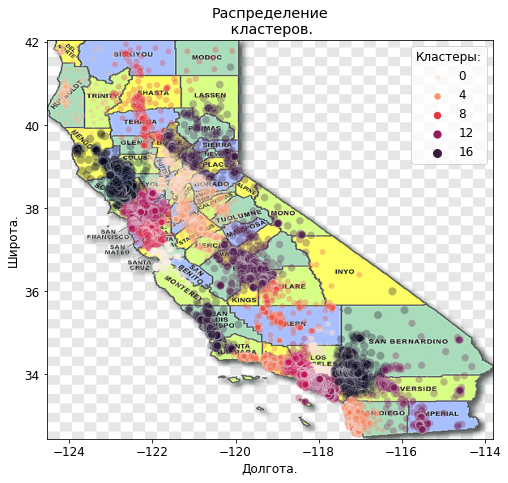

In [11]:
# Соберём выбранные признаки в вектор значений.
lat_long_assembler = VectorAssembler(
    inputCols=["latitude", "longitude"], 
    outputCol="features"
)
df = lat_long_assembler.transform(df)

# Обучим и применим модель кластеризации KMeans к признакам.
kmeans = KMeans(k=20, seed=SEED)
df = kmeans.fit(df.select('features')).transform(df)

# Cбросим ненужный более вектор значений признаков и 
# переименуем финальный признак.
df = df.drop('features')
df = df.withColumnRenamed('prediction', 'lat_long_cluster')

# Выведем первые 5 строк датасета для проверки результата
df.show(2)

# Выведем распределение кластеров на карте.
plt.figure(figsize=(8,10))
ax = sns.scatterplot(
    data=df.select('longitude', 'latitude', 
                   'lat_long_cluster').toPandas(),
    x='longitude',
    y='latitude',
    size='lat_long_cluster',
    hue='lat_long_cluster',
    palette='rocket_r',
    alpha=.3
)
ax.imshow(img, extent=[-124.55, -113.80, 32.45, 42.05])
ax.set_title('Распределение\n кластеров.')
ax.legend(title='Кластеры:')
ax.set_xlabel(f'{col_names["longitude"]}.')
ax.set_ylabel(f'{col_names["latitude"]}.')
plt.show();

#### Создание дополнительных признаков. Вывод.
Созданы дополнительные признаки на основе существующих:
- `per_capita_median_income` медианный доход на человека в долларах;
- `spaces_per_household` всего помещений на домовладение;
- `lat_long_cluster` кластеризованные координаты.

### Преобразование распределений признаков.
- Признаки `total_rooms`, `total_bedrooms`, `population`, `households` следуют распределению Парето. Для приближения этих распределений к нормальным подходит логарифмическое преобразование. Применим его поочерёдно к значениям каждого признака.
  - Создадим список признаков для трансформации.
  - Преобразуем распределения признаков.
  - Проверим результат.

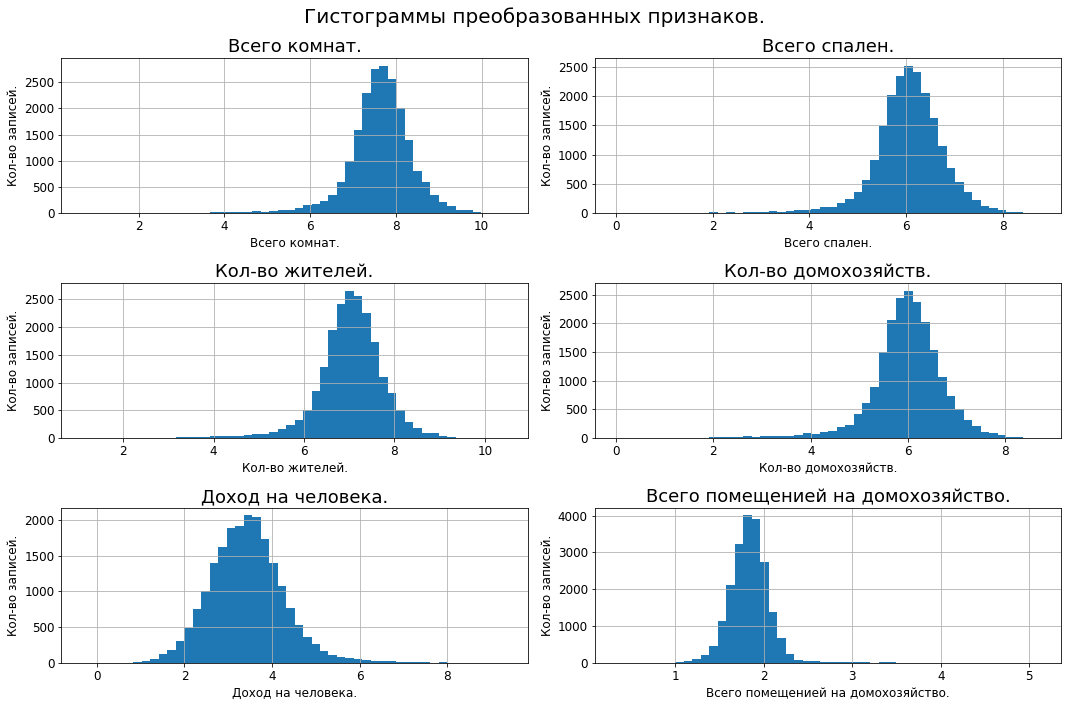

In [12]:
# Создадим список признаков для трансформации.
cols_to_log = ['total_rooms', 'total_bedrooms', 
               'population', 'households', 
               'per_capita_income', 'spaces_per_household']
i = 0
j = 0

# Преобразуем распределения признаков.
for c in cols_to_log:
    df = df.withColumn(c, F.log(c))
    
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Гистограммы преобразованных признаков.', fontsize=20)
for i in range(3):
    for j in range(2):
        c = cols_to_log[i * 2 + j]
        bins, counts = df.select(c).rdd.flatMap(lambda x: x).histogram(50)
        axes[i,j].hist(bins[:-1], bins=bins, weights=counts)
        axes[i,j].set_title(f'{col_names[c]}.', fontsize=18)
        axes[i,j].set_xlabel(f'{col_names[c]}.')
        axes[i,j].set_ylabel('Кол-во записей.')
        axes[i,j].grid()
plt.tight_layout()
plt.show();

#### Преобразование распределений признаков. Вывод.
- Произведено лог-преобразование признаков `total_rooms`, `total_bedrooms`, `population`, `households`. 
- Результирующие распределения приближены к нормальным.

### Разделение и анализ корреляции признаков.

#### Разделение признаков.
- Создадим списки количественных и качественных признаков и выделим целевой признак. 

In [13]:
# Создадим полный список количесвтенных признаков.
num_cols = ['longitude', 'latitude', 'housing_median_age', 
            'total_rooms', 'total_bedrooms', 'population', 
            'households', 'median_income', 'per_capita_income',
            'spaces_per_household']
cat_cols = ['ocean_proximity', 'lat_long_cluster']
target = 'median_house_value'

#### Анализ корреляции признаков.
- Создадим пайплайн обработки всех признаков для построения матрицы корреляции.
  - Добавим целевой признак к списку количественных признаков.
  - Создадим пайплайн кодирования качественных признаков.
    - Зададим алгоритмы кодирования категориальных признаков `StringIndexer` и `OneHotEncoder`.
    - Зададим сборщик результатов кодирования в вектор значений.
    - Создадим пайплайн.
  - Создадим пайплайн масштабирования количественных признаков.
    - Зададим сборщик признаков в вектор значений.
    - Зададим алгоритм масштабирования количественных признаков - `StandardScaler`.
    - Создадим пайплайн.
  - Создадим финальный сборщик всех трансформированных признаков.
  - Создадим финальный пайплайн трансформации всех признаков.

In [14]:
### Пайплайн для трансформации всех признаков.
## Добавим целевой признак к списку количесвтенных признаков.
num_cols_w_target = num_cols.copy()
num_cols_w_target.append('median_house_value')

## Создадим пайплайн кодирования качественных признаков.
# Зададим алгоритмы кодирования категориальных признаков.
idx_encoder = StringIndexer(inputCol='ocean_proximity',
                            outputCol='ocean_proximity_idx')
ohe_encoder = OneHotEncoder(inputCols=['ocean_proximity_idx',
                                       'lat_long_cluster'],
                            outputCols=[c+'_ohe' for c in cat_cols])     
# Зададим сборщик признаков в вектор значений.
cat_assembler = VectorAssembler(
    inputCols=[c+'_ohe' for c in cat_cols],
    outputCol='cat_feats'
)
# Создадим пайплайн.
cat_pipe = Pipeline(stages=[idx_encoder, ohe_encoder, cat_assembler])

## Создадим пайплайн масштабирования количественных признаков.
# Зададим сборщик признаков в вектор значений.
num_assembler = VectorAssembler(inputCols=num_cols_w_target,
                                outputCol='num_feats')
# Зададим алгоритм масштабирования количественных признаков.
num_scaler = StandardScaler(inputCol='num_feats',
                            outputCol="num_feats_scaled")
# Создадим пайплайн.
num_pipe = Pipeline(stages=[num_assembler, num_scaler])

## Финальный сборщик трансформированных признаков.
transform_assembler = VectorAssembler(
    inputCols=['cat_feats', 'num_feats_scaled'],
    outputCol="features"
)

## Финальный пайплайн трансформации признаков.
transform_pipe = Pipeline(stages=[cat_pipe, num_pipe, transform_assembler])

- Трансформируем все признаки и выделим результирующий вектор `features`.
- Выведем матрицу корреляции.

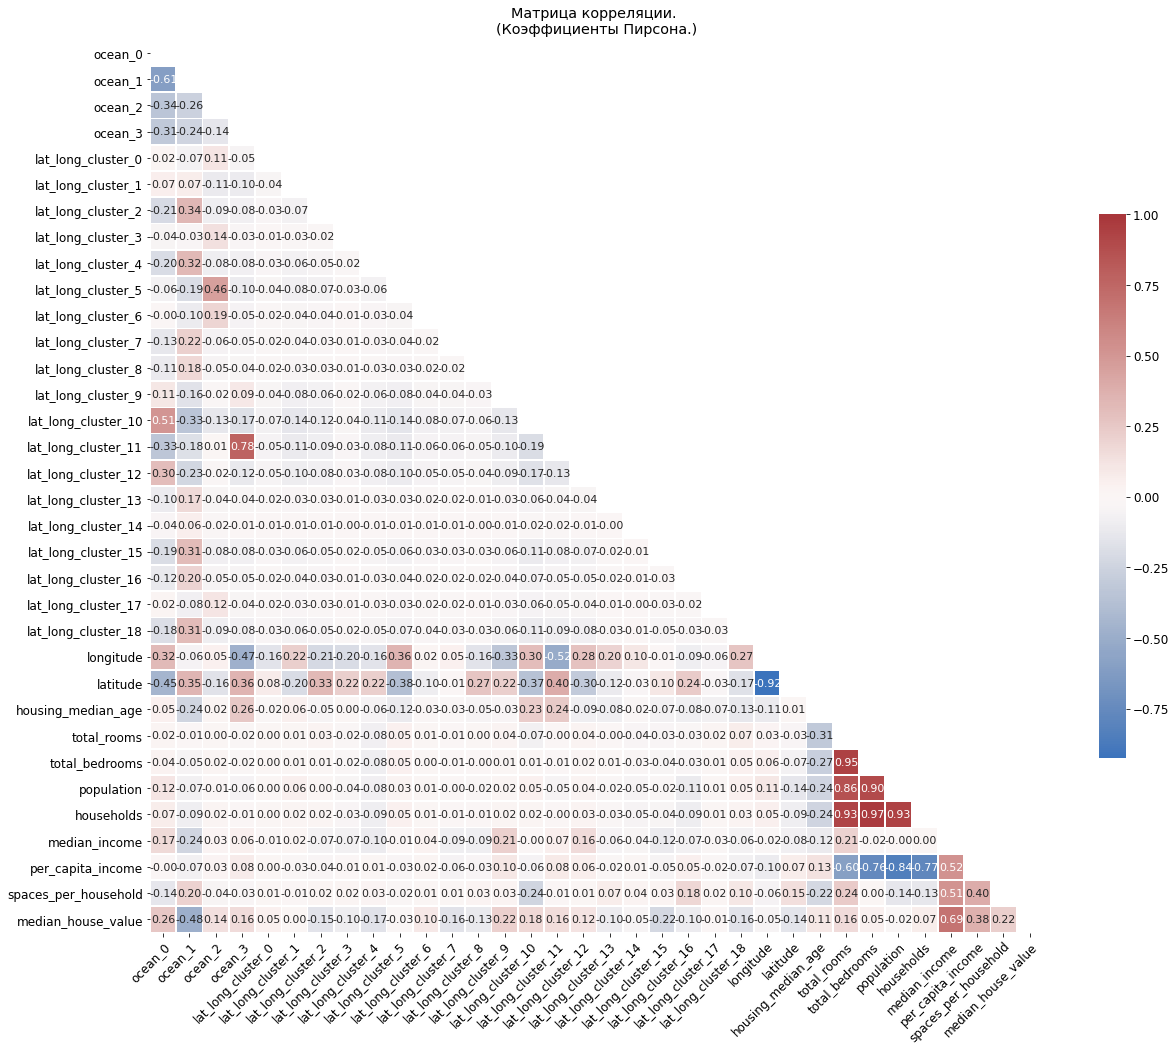

In [15]:
# Трансформируем все признаки.
df_to_corr = transform_pipe.fit(df).transform(df).select('features')

# Построим матрицу корреляции.
matrix = Correlation.corr(df_to_corr, 'features')
corr_matrix = matrix.collect()[0][0].toArray().tolist()

# Определим названия столбцов/строк матрицы.
columns = ['ocean_' + f'{i}' for i in range(4)]
columns.extend(['lat_long_cluster_' + f'{i}' for i in range(19)])
columns.extend(num_cols_w_target)

# Преобразуем матрицу в датафрейм Pandas для визуализации.
df_corr = pd.DataFrame(corr_matrix, columns=columns, index=columns)

# Выведем корреляционную матрицу. 
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(20, 20))
sns.heatmap(df_corr, annot=True, fmt='.2f', annot_kws={"size": 11},
            mask=mask, cmap='vlag', vmax=1.0, center=0,
            square=True, linewidths=.7, cbar_kws={"shrink": .5})
plt.title(f'Матрица корреляции. \n(Коэффициенты Пирсона.)')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show();

#### Разделение и анализ корреляции признаков. Вывод.
- Обнаружена мультиколлинеарность признаков `longitude` и `latitude`. При тестировании модели на отобранных признаках, удалим эти признаки и заменим на `lat_lon_cluster_n`.
- Подтверждена мультиколлинеарность признаков `population`, `total_rooms`, `total_bedrooms`, `households`. При тестировании модели на отобранных признаках, удалим признаки и добавим признаки `per_capita` и `spaces_per_household`.
- Заметна средняя корреляция сгенерированных признаков `lat_lon_cluster_11` и `ocean_3`. Проверим посодействуют ли эти признаки объяснительной способности модели.

## Построение моделей.
Построим две модели линейной регрессии на разных наборах данных:
- используя все данные из файла;
- используя только числовые переменные, исключив категориальные,
- используя сгенерированные признаки, исключив их оригиналы.<br>

Для построения модели используем оценщик `LinearRegression` из библиотеки `MLlib`.

- Для оценки и сравнения метрики на каждом наборе данных, введём функцию вычисления `RMSE` константной модели.

In [16]:
# Функция вычисления RMSE константной модели.
def get_constant_rmse(preds):
    avg_target = round(
        preds.select(F.avg('median_house_value')).collect()[0][0], 2
    )
    preds = preds.withColumn('mean', F.rand() * 0 + avg_target)
    preds = preds.withColumn('squared_error', (F.col('mean') - \
                                               F.col('median_house_value'))**2)
    rmse_default= round(preds.select(
        F.sqrt(F.avg(F.col('squared_error')))
    ).collect()[0][0], 2)
    return rmse_default

<span id="fn1">
    
### Разделение выборок.    
- Разделим данные на обучающую и тестовую выборки в соотношении 75% / 25%.
- Проверим результат.

In [17]:
# Разделим данные на выборки.
train, test = (df.randomSplit([.75,.25], seed=SEED))

# Проверим результат.
print(f'Размер обучающей выборки: ({train.count()}'+
      f', {len(train.columns)})') 
print(f'Размер тестовой выборки: ({test.count()}'+
      f', {len(test.columns)})') 

Размер обучающей выборки: (15500, 13)
Размер тестовой выборки: (5140, 13)


### Построение модели: все данные.
- Построим пайплайн, используя все признаки, исключив созданные:
  - Зададим список нерассматриваемых признаков.
  - Создадим пайплайн кодирования качественных признаков.
    - Зададим алгоритмы кодирования категориального признака `StringIndexer` и `OneHotEncoder`.
    - Создадим пайплайн.
  - Создадим пайплайн масштабирования количественных признаков.
    - Зададим сборщик признаков в вектор значений.
    - Зададим алгоритм масштабирования количественных признаков - `StandardScaler`.
    - Создадим пайплайн.
  - Создадим финальный сборщик всех трансформированных признаков.
  - Зададим модель линейной регрессии.
  - Создадим финальный пайплайн.

#### Пайплайн для модели со всеми данными.

In [18]:
## Зададим список нерассматриваемых признаков.
drop_main = ['per_capita_income', 
             'spaces_per_household']

num_cols_main = [c for c in num_cols if c not in drop_main]

### Пайплайн для трансформации всех признаков.
## Создадим пайплайн кодирования качественных признаков.
# Зададим алгоритмы кодирования категориальных признаков.
idx_encoder_main = StringIndexer(inputCol='ocean_proximity',
                            outputCol='ocean_proximity_idx')
ohe_encoder_main = OneHotEncoder(inputCol='ocean_proximity_idx',
                            outputCol='ocean_proximity_ohe')     
# Создадим пайплайн.
cat_pipe_main = Pipeline(stages=[idx_encoder_main, ohe_encoder_main])

## Создадим пайплайн масштабирования количественных признаков.
# Зададим сборщик признаков в вектор значений.
num_assembler_main = VectorAssembler(inputCols=num_cols_main,
                                     outputCol='num_feats')
# Зададим алгоритм масштабирования количественных признаков.
num_scaler_main = StandardScaler(inputCol='num_feats',
                                 outputCol="num_feats_scaled")
# Создадим пайплайн.
num_pipe_main = Pipeline(stages=[num_assembler_main, num_scaler_main])

## Финальный сборщик трансформированных признаков.
transform_assembler_main = VectorAssembler(
    inputCols=['ocean_proximity_ohe', 'num_feats_scaled'],
    outputCol='features_main'
)

# Зададим модель.
lr_main = LinearRegression(featuresCol='features_main', 
                           labelCol=target)
# Финальный пайплайн.
final_pipe_main = Pipeline(stages=[cat_pipe_main, 
                                   num_pipe_main, 
                                   transform_assembler_main,
                                   lr_main])

#### Обучение модели. Метрики.
- Предскажем значения на тестовой выборке.
- Выведем метрики.

In [20]:
# Обучим модель на обучающей выборке.
model_main = final_pipe_main.fit(train)

# Сделаем предсказание на тестовой выборке.
preds_main = model_main.transform(test)

# Выведем первые 10 строк предсказаний.
preds_main.select('prediction', target).show(10)

# Выведем метрики.
print('RMSE константной модели на всех данных: '+
      f'{get_constant_rmse(preds_main)}.')
evaluator = RegressionEvaluator(predictionCol='prediction', 
                                labelCol=target, 
                                metricName='rmse')
print('RMSE модели на всех данных:',
      round(evaluator.evaluate(preds_main), 2))
print('MAE модели на всех данных:',
      round(evaluator.evaluate(preds_main, 
                               {evaluator.metricName: 'mae'}), 2))
print('r2 модели на всех данных:',
      round(evaluator.evaluate(preds_main, 
                               {evaluator.metricName: 'r2'}), 2))

23/10/07 06:11:14 WARN Instrumentation: [15a5ea0d] regParam is zero, which might cause numerical instability and overfitting.
23/10/07 06:11:16 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


+------------------+------------------+
|        prediction|median_house_value|
+------------------+------------------+
|137238.90241820412|          103600.0|
| 201356.7603860004|          106700.0|
|110077.74677162338|           73200.0|
|112980.50970994262|           78300.0|
| 180821.9670748962|           90100.0|
| 140646.5421466031|           67000.0|
|  179143.041981739|           86400.0|
| 152548.4919334408|           70500.0|
|201998.32182172872|           60000.0|
|160125.71820191294|           75500.0|
+------------------+------------------+
only showing top 10 rows

RMSE константной модели на всех данных: 116502.17.


RMSE модели на всех данных: 66124.61
MAE модели на всех данных: 48160.6


r2 модели на всех данных: 0.68


### Построение модели: только количественные признаки.
- Построим модель только со смасштабированными количественными признаками, исключив созданные.
  - Зададим список нерассматриваемых признаков.
  - Создадим пайплайн масштабирования количественных признаков.
    - Зададим сборщик признаков в вектор значений.
    - Зададим алгоритм масштабирования количественных признаков - `StandardScaler`.
    - Создадим пайплайн.
  - Создадим финальный сборщик всех трансформированных признаков.
  - Зададим модель линейной регрессии.
  - Создадим финальный пайплайн.

#### Пайплайн для модели с количественными признаками.

In [21]:
## Зададим список нерассматриваемых признаков.
drop_num = ['per_capita_income', 
            'spaces_per_household']

num_cols_num = [c for c in num_cols if c not in drop_num]

### Пайплайн для трансформации всех признаков.
## Создадим пайплайн масштабирования количественных признаков.
# Зададим сборщик признаков в вектор значений.
num_assembler_num = VectorAssembler(inputCols=num_cols_num,
                                     outputCol='num_feats')
# Зададим алгоритм масштабирования количественных признаков.
num_scaler_num = StandardScaler(inputCol='num_feats',
                                 outputCol="features_num")

# Зададим модель.
lr_num = LinearRegression(featuresCol='features_num', 
                          labelCol=target)
# Финальный пайплайн.
final_pipe_num = Pipeline(stages=[num_assembler_num, 
                                  num_scaler_num,
                                  lr_num])

#### Обучение модели. Метрики.
- Предскажем значения на тестовой выборке.
- Выведем метрики.

In [23]:
# Обучим модель на обучающей выборке.
model_num = final_pipe_num.fit(train)

# Сделаем предсказание на тестовой выборке.
preds_num = model_num.transform(test)

# Выведем первые 10 строк предсказаний.
preds_num.select('prediction', target).show(10)

# Выведем метрики.
print('RMSE константной модели на количественных данных: '+
      f'{get_constant_rmse(preds_num)}.')
evaluator = RegressionEvaluator(predictionCol='prediction', 
                                labelCol=target, 
                                metricName='rmse')
print('RMSE модели на количественных данных:',
      round(evaluator.evaluate(preds_num), 2))
print('MAE модели на количественных данных:',
      round(evaluator.evaluate(preds_num, 
                               {evaluator.metricName: 'mae'}), 2))
print('r2 модели на количественных данных:',
      round(evaluator.evaluate(preds_num, 
                               {evaluator.metricName: 'r2'}), 2))

23/10/07 06:11:25 WARN Instrumentation: [f6133fe1] regParam is zero, which might cause numerical instability and overfitting.


+------------------+------------------+
|        prediction|median_house_value|
+------------------+------------------+
| 99518.43952032225|          103600.0|
|  180310.972948669|          106700.0|
| 71629.55526498286|           73200.0|
| 76173.00645667315|           78300.0|
|156712.57222208427|           90100.0|
|116462.70618702145|           67000.0|
|  156152.092099383|           86400.0|
|127457.64941795683|           70500.0|
| 184852.1644298397|           60000.0|
| 137429.5021609068|           75500.0|
+------------------+------------------+
only showing top 10 rows

RMSE константной модели на количественных данных: 116502.17.
RMSE модели на количественных данных: 66762.61
MAE модели на количественных данных: 48832.84
r2 модели на количественных данных: 0.67


### Построение модели: отобранные признаки.
- Построим модель:
  - с включением сгенерированных признаков;
  - с закодированными категориальными признаками;
  - со смасштабированными количественными признаками.
- Построим пайплайн, используя созданные признаки, исключив отобранные:
  - Зададим список нерассматриваемых признаков.
  - Создадим пайплайн кодирования качественных признаков.
    - Зададим алгоритмы кодирования категориального признака `StringIndexer` и `OneHotEncoder`.
    - Создадим пайплайн.
  - Создадим пайплайн масштабирования количественных признаков.
    - Зададим сборщик признаков в вектор значений.
    - Зададим алгоритм масштабирования количественных признаков - `StandardScaler`.
    - Создадим пайплайн.
  - Создадим финальный сборщик всех трансформированных признаков.
  - Зададим модель.
  - Создадим финальный пайплайн.

#### Пайплайн для модели с отобранными признаками.

In [24]:
## Зададим список нерассматриваемых признаков.
drop_custom = ['latitude', 'longitude', 'total_rooms',
               'total_bedrooms', 'population', 'households',]

num_cols_custom = [c for c in num_cols if c not in drop_custom]

### Пайплайн для трансформации всех признаков.
## Создадим пайплайн кодирования качественных признаков.
# Зададим алгоритмы кодирования категориальных признаков.
idx_encoder_custom = StringIndexer(inputCol='ocean_proximity',
                            outputCol='ocean_proximity_idx')
ohe_encoder_custom = OneHotEncoder(inputCols=['ocean_proximity_idx',
                                       'lat_long_cluster'],
                            outputCols=[c+'_ohe' for c in cat_cols]) 

# Зададим сборщик признаков в вектор значений.
cat_assembler = VectorAssembler(
    inputCols=[c+'_ohe' for c in cat_cols],
    outputCol='cat_feats'
)

# Создадим пайплайн.
cat_pipe_custom = Pipeline(stages=[idx_encoder_custom, 
                                   ohe_encoder_custom, 
                                   cat_assembler])

## Создадим пайплайн масштабирования количественных признаков.
# Зададим сборщик признаков в вектор значений.
num_assembler_custom = VectorAssembler(inputCols=num_cols_custom,
                                       outputCol='num_feats')
# Зададим алгоритм масштабирования количественных признаков.
num_scaler_custom = StandardScaler(inputCol='num_feats',
                                   outputCol="num_feats_scaled")
# Создадим пайплайн.
num_pipe_custom = Pipeline(stages=[num_assembler_custom, 
                                   num_scaler_custom])

## Финальный сборщик трансформированных признаков.
transform_assembler_custom = VectorAssembler(
    inputCols=['cat_feats', 'num_feats_scaled'],
    outputCol='features_custom'
)

# Зададим модель.
lr_custom = LinearRegression(featuresCol='features_custom', 
                             labelCol=target)

# Финальный пайплайн.
final_pipe_custom = Pipeline(stages=[cat_pipe_custom,
                                     num_pipe_custom,
                                     transform_assembler_custom,
                                     lr_custom])

#### Обучение модели. Метрики.
- Предскажем значения на тестовой выборке.
- Выведем метрики.

In [26]:
# Обучим модель на обучающей выборке.
model_custom = final_pipe_custom.fit(train)

# Сделаем предсказание на тестовой выборке.
preds_custom = model_custom.transform(test)

# Выведем первые 10 строк предсказаний.
preds_custom.select('prediction', target).show(10)

# Выведем метрики.
print('RMSE константной модели на отобранных признаках: '+
      f'{get_constant_rmse(preds_custom)}.')
evaluator = RegressionEvaluator(predictionCol='prediction', 
                                labelCol=target, 
                                metricName='rmse')
print('RMSE модели на отобранных признаках:',
      round(evaluator.evaluate(preds_custom), 2))
print('MAE модели на отобранных признаках:',
      round(evaluator.evaluate(preds_custom, 
                               {evaluator.metricName: 'mae'}), 2))
print('r2 модели на отобранных признаках:',
      round(evaluator.evaluate(preds_custom, 
                               {evaluator.metricName: 'r2'}), 2))

23/10/07 06:11:33 WARN Instrumentation: [6f4b349b] regParam is zero, which might cause numerical instability and overfitting.


+------------------+------------------+
|        prediction|median_house_value|
+------------------+------------------+
|126305.16355451454|          103600.0|
|146679.94235933604|          106700.0|
|104015.52684556485|           73200.0|
|  81637.6432184838|           78300.0|
| 143549.0990536107|           90100.0|
|103623.45231135518|           67000.0|
|130901.74362841198|           86400.0|
|100068.78198261028|           70500.0|
| 68024.76644412475|           60000.0|
| 91277.95773943832|           75500.0|
+------------------+------------------+
only showing top 10 rows

RMSE константной модели на отобранных признаках: 116502.17.
RMSE модели на отобранных признаках: 69828.81
MAE модели на отобранных признаках: 50635.96
r2 модели на отобранных признаках: 0.64


### Построение моделей. Выводы.
- Модели линейной регрессии были обучены 
  - на всех данных, 
  - на количественных данных, 
  - на сгенерированных признаках, исключая оригиналы для борьбы с мультиколлинеарностью.
- Лучшие рез-ты по целевым метрикам показала модель обученная на всех данных без учёта мультиколлинеарности:
  - возможно переобучение,
  - присутствует явная зависимость медианной стоимости домов от географического местоположения и, в частности, от удалённости от океана.
  
#### Анализ RMSE.
- Все модели показали неплохое отличие от константной, но среднеквадратичная ошибка велика, в среднем 65 тыс. долларов при максимальной медианной цене дома в 500 тыс. долларов. Это, скорее всего, обусловлено ненормальностью распределений и выбросами, например, точками отсечения возраста дома и медианной цены.

#### Анализ MAE.
- Лучшая модель по данной метрике была обучена на всех данных, худшая на отобранных признаках.

#### Анализ r2 коэффициента детерминации.
- Показатели коэффициента детерминации (диапазон (-∞; 1]) говорят об относительной успешности моделей. 0.64 - 0.68 в зависимости от используемых данных - неплохой показатель для моделей без подбора гиперпараметров. 

#### Рекомендации.
Улучшению качества предсказаний регрессионных моделей могут поспособствовать:
- удаление или уточнение данных в точках отсечения (возраст дома, медианная цена дома);
- дополнительная нормализация распределений признаков;
- дополнительная и более точная генерация признаков, в частности, основанных на гео-координатах;
- проведение кросс-валидации для подбора гиперпараметров моделей.

## Остановка spark сессии.

In [27]:
spark.stop()

## Анализ результатов работы.

### Информация о составе данных.
- Размер датасета: 20640 записей, 10 признаков.
- Данные представлены 9-ю количественными и одним категориальным признаком.

### Целевой признак:
- Целевой признак `median_house_value` - количественный, непрерывный. <br> 

### Задача машинного обучения.
- Т.к. целевой признак определён и непрерывен, задача машинного обучения сводится к обучению с учителем, регрессионному нализу.

### Преобразование распределений признаков.
Проведено логарифмическое преобразование распределений признаков.
  - `total_rooms`, 
  - `total_bedrooms`, 
  - `population`, 
  - `households`.
  
### Заполнение пропусков.
- Пропуски в признаке `total_bedrooms` успешно заполнены.

### Мультиколлинеарность.
Был проведён анализ корреляции признаков.
- Обнаружена мультиколлинеарность признаков `longitude` и `latitude`. При тестировании модели на отобранных признаках, удалим эти признаки и заменим на `lat_lon_cluster`.
- Подтверждена мультиколлинеарность признаков `population`, `total_rooms`, `total_bedrooms`, `households`. 

Для борьбы с мультиколлинеарностью были созданы дополнительные признаки на основе существующих:
- `per_capita_median_income` медианный доход на человека в долларах;
- `spaces_per_household` всего помещений на домовладение;
- `lat_long_cluster` кластеризованные координаты.

### Построение моделей.
- Модели линейной регрессии были обучены 
  - на всех данных, 
  - на количественных данных, 
  - на сгенерированных признаках, исключая оригиналы для борьбы с мультиколлинеарностью.
- Лучшие рез-ты по целевым метрикам показала модель обученная на всех данных без учёта мультиколлинеарности:
  - возможно переобучение,
  - присутствует явная зависимость медианной стоимости домов от географического местоположения и, в частности, от удалённости от океана.
  
#### Анализ RMSE.
- Все модели показали неплохое отличие от константной, но среднеквадратичная ошибка велика, в среднем 65 тыс. долларов при максимальной медианной цене дома в 500 тыс. долларов. Это, скорее всего, обусловлено выбросами, например, точками отсечения возраста дома и медианной цены.

#### Анализ MAE.
- Лучшая модель по данной метрике была обучена на всех данных, худшая на отобранных признаках.

#### Анализ r2 коэффициента детерминации.
- Показатели коэффициента детерминации (диапазон (-∞; 1]) говорят об относительной успешности моделей. 0.64 - 0.68 в зависимости от используемых данных - неплохой показатель для моделей без подбора гиперпараметров. 

### Рекомендации.
Улучшению качества предсказаний регрессионных моделей могут поспособствовать:
- удаление или уточнение данных в точках отсечения (возраст дома, медианная цена дома);
- дополнительная нормализация распределений признаков;
- дополнительная и более точная генерация признаков, в частности, основанных на гео-координатах;
- проведение кросс-валидации для подбора гиперпараметров моделей.